<a href="https://colab.research.google.com/github/manishbayesian/bayesianbookpub/blob/main/Copy_of_Chapter2_Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book Figures - Chapter 2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sympy as sp
from sympy.plotting import plot
import numpy as np
import matplotlib as mpl

mpl.style.use('classic')
sns.set(style='darkgrid')
sns.set_theme(style="darkgrid")

pd.set_option('display.precision', 3)
pd.set_option('display.float_format',  '{:,.3f}'.format)
mpl.rcParams['font.size'] = 24
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['legend.title_fontsize'] = 20
mpl.rcParams['axes.labelpad'] = -24
mpl.rcParams['axes.labelsize'] = 26
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 4.5
mpl.rcParams['axes.labelweight'] = 'bold'

## Chapter 2 - Distributions

### Example 2.4 - 2.7

In [ ]:
## formulae for marginals, conditionals and joint densities
def f_X(x):
  return 2*x + np.log(1/(x*x))-2 if (x >= 0 and x < 1) else 0

def f_XR(x,r):
  return 2*r/(1-r) if (x >= 0 and x <= 1-r and 1-r < 1) else 0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


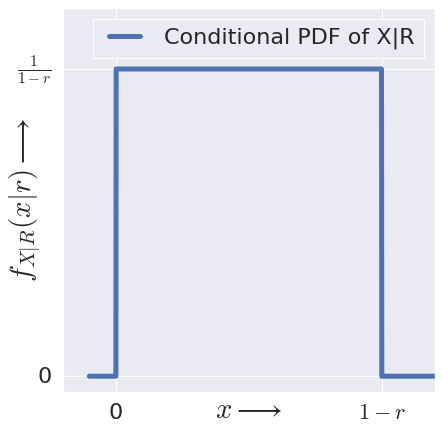

In [ ]:
### Conditional Density
X = np.linspace(-0.1,1.2,1200)
plt.figure(figsize=(6,6))
ax = sns.lineplot(X, y=map(lambda x: 1 if (x >= 0 and x < 1) else 0, X))
ax.set_xlabel(r'$x \longrightarrow$')#,fontsize=24, labelpad=-24)
ax.set_ylabel(r'$f_{X|R}(x|r) \longrightarrow$')#,fontsize=24)#,labelpad=-30)
ax.set_ylim([-0.05,1.2])
ax.set_xticks([0,1])
ax.set_xticklabels(['0','$1-r$'])#,fontsize=20)
ax.set_yticks([0,1])
ax.set_yticklabels(['0',r'$\frac{1}{1-r}$'])#,fontsize=16)
plt.legend(labels=['Conditional PDF of X|R'])#,fontsize=16)
plt.show()

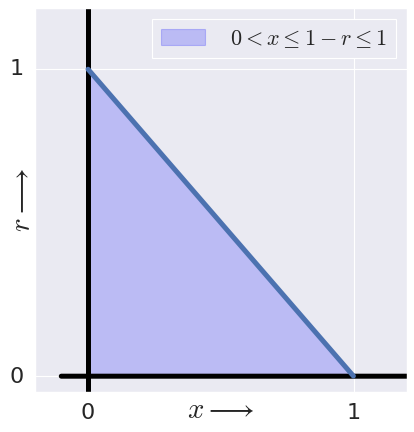

In [ ]:
## Region of Integration
X = np.linspace(-0.1,1.2,1200)
plt.figure(figsize=(6,6))
ax = sns.lineplot(x=X, y=map(lambda x: 0, X), color='black',
        label='_nolegend_')
#ax=sns.lineplot(x=[0,0], y=[0,1], color='b',
#        linewidth=2.5)
plt.axvline(x=0, ymin=0,ymax=1,color='black',label='_nolegend_')
Y = list(map(lambda x: 1-x if (x >= 0 and x < 1) else np.nan, X))
ax = sns.lineplot(x=X, y=Y, 
        color='b',label='_nolegend_')
ax.fill_between(X, 0, Y, color='blue', alpha=.2)
ax.set_xlabel(r'$x \longrightarrow$')
ax.set_ylabel(r'$r \longrightarrow$')
ax.set_ylim([-0.05,1.2])
ax.set_xticks([0,1])
#ax.set_xticklabels(['0','$1-r$'],fontsize=14)
ax.set_yticks([0,1])
#ax.set_yticklabels(['0',r'$\frac{1}{1-r}$'],fontsize=16)
plt.legend(labels=[r' $0<x\leq 1-r \leq1$'])
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


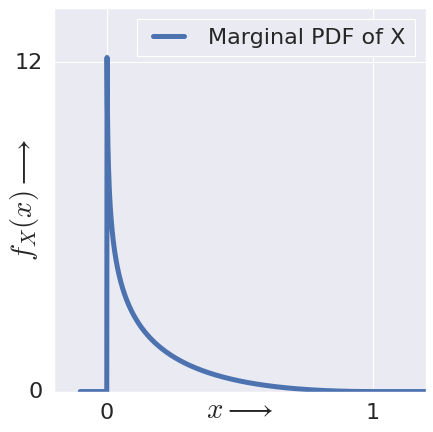

In [ ]:
## Marginal Density
X = np.linspace(-0.1,1.2,1200)
plt.figure(figsize=(6,6))
ax = sns.lineplot(X, y=map(f_X, X))
ax.set_xlabel(r'$x \longrightarrow$')
ax.set_ylabel(r'$f_X(x) \longrightarrow$')
ax.set_xticks([0,1])
ax.set_yticks([0,12])
plt.legend(labels=['Marginal PDF of X'])
plt.show()

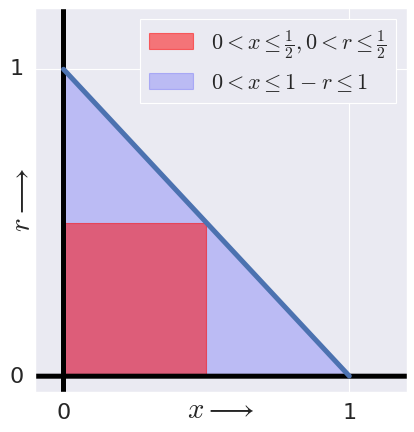

In [ ]:
## Region of Integration for (b)(i)
## Region of Integration
X = np.linspace(-0.1,1.2,1200)
plt.figure(figsize=(6,6))
ax = sns.lineplot(x=X, y=map(lambda x: 0, X), color='black',
        label='_nolegend_')
#ax=sns.lineplot(x=[0,0], y=[0,1], color='b',
#        linewidth=2.5)
plt.axvline(x=0, ymin=0,ymax=1,color='black',label='_nolegend_')
Y = list(map(lambda x: 1-x if (x >= 0 and x < 1) else np.nan, X))
ax = sns.lineplot(x=X, y=Y, 
        color='b',label='_nolegend_')
ax.fill_between(X, 0, Y, color='blue', alpha=.2)
ax.set_xlabel(r'$x \longrightarrow$')
ax.set_ylabel(r'$r \longrightarrow$')
ax.set_ylim([-0.05,1.2])
ax.set_xticks([0,1])
#ax.set_xticklabels(['0','$1-r$'],fontsize=14)
ax.set_yticks([0,1])
#ax.set_yticklabels(['0',r'$\frac{1}{1-r}$'],fontsize=16)
ax.axvspan(0, 0.5, ymin=0.04, ymax=0.44, alpha=0.5, color='red')
plt.legend(labels=[r'$0< x \leq\frac{1}{2}, 0<r\leq\frac{1}{2}$',
                   r'$0<x\leq 1-r \leq1$'],
           )
plt.show()

### Bayes Rule to calculate posterior $f_{R|X}(r|x)$

In [ ]:
def f_RcX(r,x):
  return f_XR(x,r)/f_X(x)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

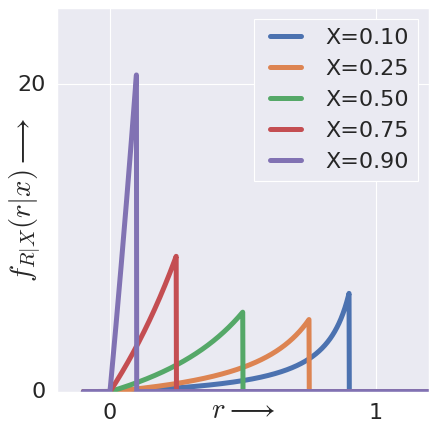

In [ ]:
R = np.linspace(-0.1,1.2,1200)
plt.figure(figsize=(6,6))
for x in [0.1, 0.25, 0.5, 0.75, 0.9]:  
  ax = sns.lineplot(R, y=map(lambda r: f_RcX(r,x), R), 
        label='X={:.02f}'.format(x))
#ax = sns.lineplot(R, y=map(lambda r: f_RcX(r,0.2), R), 
#        linewidth=2.5, label='X={:.02f}'.format(0.2))
ax.set_xlabel(r'$r \longrightarrow$')
ax.set_ylabel(r'$f_{R|X}(r|x) \longrightarrow$')
ax.set_xticks([0,1])
ax.set_yticks([0,20])
plt.show()

### Region of integration for Example D7

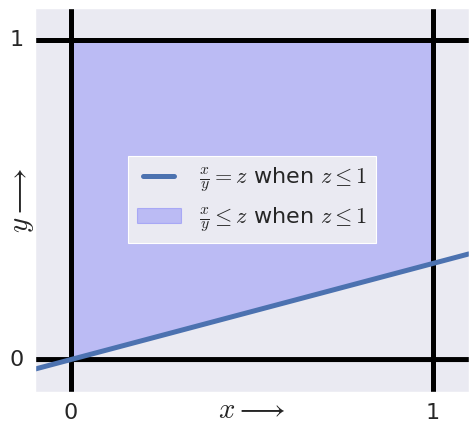

In [ ]:
X = np.linspace(-0.1,1.2,1200)
plt.figure(figsize=(7,6))
ax = sns.lineplot(x=X, y=map(lambda x: 0, X), color='black',
        label='_nolegend_')
#ax=sns.lineplot(x=[0,0], y=[0,1], color='b',
#        linewidth=2.5)
plt.axvline(x=0, ymin=0,ymax=2,color='black',label='_nolegend_')
plt.axhline(y=1,xmin=0,xmax=1,color='black',label='_nolegend_')
plt.axvline(x=1, ymin=0,ymax=1,color='black',label='_nolegend_')
#ax = sns.lineplot(x=X, y=map(lambda x: 0., X), color='black',
#        linewidth=1.5,label='_nolegend_')
Yf = list(map(lambda x: 0.3*x if (x >= 0 and x < 1) else np.nan, X))
Y = list(map(lambda x: 0.3*x , X))
ax = sns.lineplot(x=X, y=Y, 
         color='b')
ax.fill_between(X, Yf, 1, color='blue', alpha=.2)
#ax.fill_between()
plt.legend(labels=[r'$\frac{x}{y}=z$ when $z \leq 1$',
                   r'$\frac{x}{y} \leq z$ when $z \leq 1$',
                  ],
           loc='center')
#plt.legend
ax.set_xlabel(r'$x \longrightarrow$')
ax.set_ylabel(r'$y \longrightarrow$')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xlim([-0.1,1.1])
ax.set_ylim([-0.1,1.1])
plt.show()

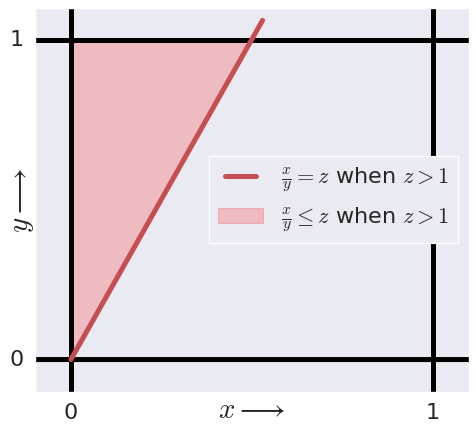

In [ ]:
X = np.linspace(-0.1,1.2,1200)
plt.figure(figsize=(7,6))
ax = sns.lineplot(x=X, y=map(lambda x: 0, X), color='black',
        label='_nolegend_')
#ax=sns.lineplot(x=[0,0], y=[0,1], color='b',
#        linewidth=2.5)
plt.axvline(x=0, ymin=0,ymax=2,color='black',label='_nolegend_')
plt.axhline(y=1,xmin=0,xmax=1,color='black',label='_nolegend_')
plt.axvline(x=1, ymin=0,ymax=1,color='black',label='_nolegend_')
#ax = sns.lineplot(x=X, y=map(lambda x: 0., X), color='black',
#        linewidth=1.5,label='_nolegend_')
X = np.linspace(0,0.53,500)
Yf = list(map(lambda x: 2*x if (x >= 0 and x < 0.5) else np.nan, X))

Y = list(map(lambda x: 2*x , X))
ax = sns.lineplot(x=X, y=Y, 
        color='r')
ax.fill_between(X, Yf, 1, color='red', alpha=.2)
#ax.fill_between()
plt.legend(labels=[r'$\frac{x}{y}=z$ when $z > 1$',
                   r'$\frac{x}{y} \leq z$ when $z > 1$',
                  ],
           loc='right')

#plt.legend
ax.set_xlabel(r'$x \longrightarrow$')
ax.set_ylabel(r'$y \longrightarrow$')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xlim([-0.1,1.1])
ax.set_ylim([-0.1,1.1])
plt.show()

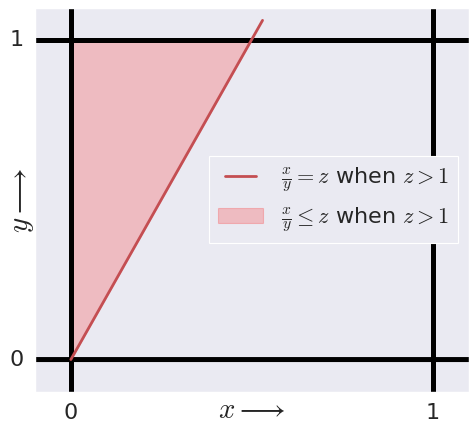

In [ ]:
X = np.linspace(-0.1,1.2,1200)
plt.figure(figsize=(7,6))
ax = sns.lineplot(x=X, y=map(lambda x: 0, X), color='black',
        label='_nolegend_')
#ax=sns.lineplot(x=[0,0], y=[0,1], color='b',
#        linewidth=2.5)
plt.axvline(x=0, ymin=0,ymax=2,color='black',label='_nolegend_')
plt.axhline(y=1,xmin=0,xmax=1,color='black',label='_nolegend_')
plt.axvline(x=1, ymin=0,ymax=1,color='black',label='_nolegend_')
#ax = sns.lineplot(x=X, y=map(lambda x: 0., X), color='black',
#        linewidth=1.5,label='_nolegend_')
X = np.linspace(0,0.53,500)
Yf = list(map(lambda x: 2*x if (x >= 0 and x < 0.5) else np.nan, X))

Y = list(map(lambda x: 2*x , X))
ax = sns.lineplot(x=X, y=Y, 
        linewidth=2.5, color='r')
ax.fill_between(X, Yf, 1, color='red', alpha=.2)
#ax.fill_between()
plt.legend(labels=[r'$\frac{x}{y}=z$ when $z > 1$',
                   r'$\frac{x}{y} \leq z$ when $z > 1$',
                  ],
           loc='right')

#plt.legend
ax.set_xlabel(r'$x \longrightarrow$')
ax.set_ylabel(r'$y \longrightarrow$')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xlim([-0.1,1.1])
ax.set_ylim([-0.1,1.1])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


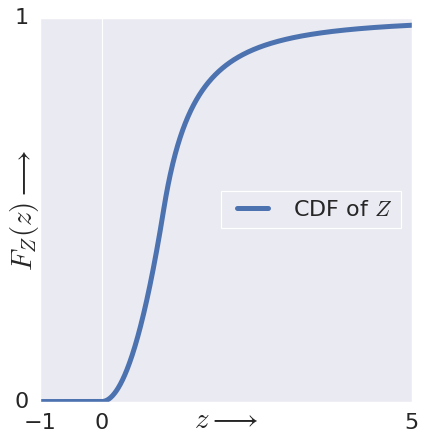

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


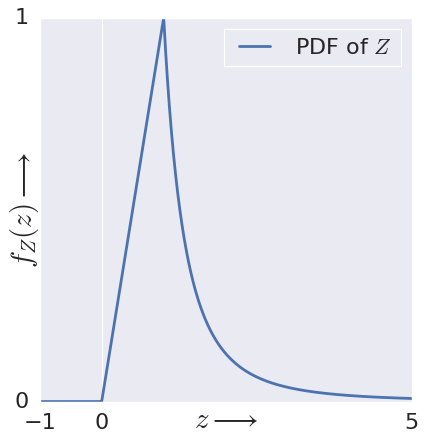

In [ ]:
### CDF and PDF of Z 
## CDF Density
def F_Z(z):
  return 0 if z < 0 else \
     (0.5*z*z if z < 1. else 1. - 1./(2*z*z))

def f_Z(z):
  return 0 if z < 0 else \
     (z if z < 1. else 1./(z*z*z))

X = np.linspace(-1,5,1200)

plt.figure(figsize=(6,6))
ax = sns.lineplot(X, y=map(F_Z, X))
ax.set_xlabel(r'$z \longrightarrow$')
ax.set_ylabel(r'$F_Z(z) \longrightarrow$')
#ax.set_xticks([0,0.5,1])
ax.set_yticks([0,0.5,1])
plt.legend(labels=['CDF of $Z$'],loc='center right')
#ax.set_title('CDF of $Z$')
ax.set_xticks([-1,0,5])
ax.set_yticks([0,1])
plt.show()

plt.figure(figsize=(6,6))
ax = sns.lineplot(X, y=map(f_Z, X), 
        linewidth=2.5)
ax.set_xlabel(r'$z \longrightarrow$')
ax.set_ylabel(r'$f_Z(z) \longrightarrow$')
ax.set_xticks([-1,0,5])
ax.set_yticks([0,1])
plt.legend(labels=['PDF of $Z$'])
#ax.set_title('PDF of $Z$')
plt.show()

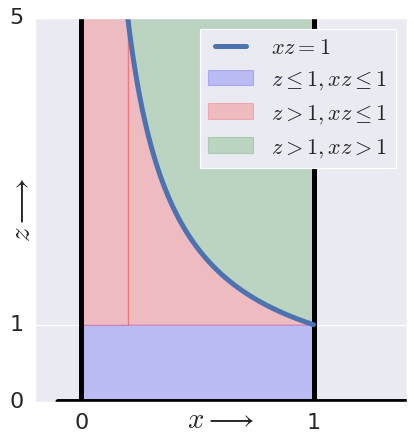

In [ ]:
### Region for using the conditional method
X = np.linspace(-0.1,1.4,1200)
plt.figure(figsize=(6,6))
ax = sns.lineplot(x=X, y=map(lambda x: 0, X), color='black',
        label='_nolegend_')
#ax=sns.lineplot(x=[0,0], y=[0,1], color='b',
#        linewidth=2.5)
plt.axvline(x=0, ymin=0,ymax=5,color='black',label='_nolegend_')
#plt.axhline(y=1,xmin=0,xmax=1,linewidth=1.5,color='black',label='_nolegend_')
plt.axvline(x=1, ymin=0,ymax=1,color='black',label='_nolegend_')
#ax = sns.lineplot(x=X, y=map(lambda x: 0., X), color='black',
#        linewidth=1.5,label='_nolegend_')
X = np.linspace(0,1., 1200)
Y1 = list(map(lambda x: 1 if (x >= 0 and x < 1) else np.nan, X))
Y2 = list(map(lambda x: 1./x if (x > 0.2 and x < 1) else np.nan, X))
Y3 = list(map(lambda x: 5 if (x > 0.2 and x < 1) else np.nan, X))
ax = sns.lineplot(x=X, y=Y2, 
        color='b')
ax.fill_between(X, Y1, color='blue', alpha=.2)
ax.fill_between(X, Y1,Y2, color='red', alpha=.2)
Xs = np.linspace(0,0.2, 500)
ax.fill_between(Xs, 1,5, color='red', alpha=.2, edgecolors=None, label='_nolegend_')
ax.fill_between(X, Y2,Y3, color='green', alpha=.2)
#ax.fill_between()
plt.legend(labels=[r'$ xz = 1$',
                   r'$ z \leq 1, xz \leq 1$',
                   r'$ z > 1, xz \leq 1$',
                   r'$ z > 1, xz > 1$'
                  ],
           loc='upper right')
#plt.legend
ax.set_xlabel(r'$x \longrightarrow$')
ax.set_ylabel(r'$z \longrightarrow$')
ax.set_xticks([0,1])
ax.set_yticks([0,1,5])
#ax.set_xlim([-0.1,1.1])
#ax.set_ylim([-0.1,1.1])
plt.show()
#ax.fill_between()